Importing importanat modules

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import time


Reading the excel

In [2]:

sheets = pd.read_excel("studentcourses2.xlsx", sheet_name=None) 

In [3]:
sheets.keys()

dict_keys(['علوم طبية ', 'صيدلة وطب اسنان', 'العلوم الادارية', 'الهندسة', 'حاسب الي'])

Deviding the 5 sheets into separeted dataframes

In [4]:
engineering = sheets["الهندسة"]
computer = sheets["حاسب الي"]
business = sheets['العلوم الادارية']
dentistry = sheets['صيدلة وطب اسنان']
medical = sheets['علوم طبية ']


intiallizing important variables 

In [5]:
df=engineering.groupby(['coursename', 'courseid'])[['coursename', 'courseid']]
df_computer=computer.groupby(['coursename', 'courseid'])[['coursename', 'courseid']]
df_medical=medical.groupby(['courseName', 'courseid'])[['courseName', 'courseid']]
df_dentistry =dentistry.groupby(['coursename', 'courseid'])[['coursename', 'courseid']]
df_cbusiness=business.groupby(['coursename', 'courseid'])[['coursename', 'courseid']]


In [6]:
course_students_computer = computer.groupby('courseid')['id'].apply(set).to_dict()
course_students_medical = medical.groupby('courseid')['id'].apply(set).to_dict()
course_students_dentistry = dentistry.groupby('courseid')['id'].apply(set).to_dict()
course_students_business = business.groupby('courseid')['id'].apply(set).to_dict()

In [7]:
student_counts_computer = computer.groupby('courseid')['id'].apply(lambda x: len(set(x)))
student_counts_medical = medical.groupby('courseid')['id'].apply(lambda x: len(set(x)))
student_counts_dentistry = dentistry.groupby('courseid')['id'].apply(lambda x: len(set(x)))
student_counts_business = business.groupby('courseid')['id'].apply(lambda x: len(set(x)))

Removing all duplicates and NANs

In [8]:
engineering = engineering.dropna()
computer = computer.dropna()
medical = medical.dropna()
dentistry = dentistry.dropna()
business = business.dropna()

In [9]:
engineering = engineering.drop_duplicates()
computer = computer.drop_duplicates()
medical = medical.drop_duplicates()
dentistry = dentistry.drop_duplicates()
business = business.drop_duplicates()

More Exploration of the data

In [10]:
engineering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1374 non-null   int64 
 1   name        1374 non-null   object
 2   major       1374 non-null   object
 3   courseid    1374 non-null   int64 
 4   coursename  1374 non-null   object
 5   coursenott  1374 non-null   object
 6   majorid     1374 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 75.3+ KB


In [11]:
engineering['coursename'].nunique()

71

In [12]:
engineering.sample(10)

,id,name,major,courseid,coursename,coursenott,majorid
682,1401322013,فيصل ناصر عائض الحربي,قوي كهربائية,110123,أسس النظام السياسي في الإسلام,104سلم,211309
1268,1401322061,محمد علي ابراهيم الطريف,قوي كهربائية,140181,مهارات الإتصال للمهندسين,108نجم,214211
839,1401321071,محمد ناصر خالد المطيري,قوي كهربائية,140172,حساب التكامل,106ريض,214183
27,1402311005,سلطان محمد سعد الغامدي,اتصالات و إلكترونيات,240608,الاتصالات الرقمية,422 كهر,240608
279,1401331004,ابراهيم على براهيم الحميد,قوي كهربائية,130106,الرياضيات (2),150ريض,113116
137,1401331003,مازن سليمان محمد الضالع,قوي كهربائية,140176,التحرير الفني,107نجم,114196
981,1401322055,فايز عزيز حمد الحربي,قوي كهربائية,140174,فيزياء عامة (1),103فيز,214188
687,1402321004,سليمان ابراهيم سليمان الغلفص,اتصالات و إلكترونيات,110123,أسس النظام السياسي في الإسلام,104سلم,111307
591,1401322023,خالد ابراهيم عبدالله الدبيان,قوي كهربائية,110117,النظام الإقتصادي في الإسلام,103سلم,211272
370,1401311017,باتع محمد رشيد عويمر,قوي كهربائية,140185,الكهرومغناطيسية الهندسية (1),213كهر,214222


In [13]:
engineering['courseid'].nunique()

73

Applying the graphe adding the nodes and adges

In [14]:
df = engineering.copy()
course_students = df.groupby('courseid')['id'].apply(set).to_dict()

# 1. Engineering

In [15]:
G = nx.Graph()
courses = df['courseid'].unique()
G.add_nodes_from(courses)

# Add edges for courses with overlapping students
for i, course1 in enumerate(courses):
    for course2 in courses[i+1:]:
        if course_students[course1] & course_students[course2]:  # Check for common students
            G.add_edge(course1, course2)

Comparing between strategies of greedy coloring algorithim to identify which is best in this case

In [16]:
# Dictionary to store results
results = {}

# List of strategies to test
strategies = [
    'largest_first',
    'random_sequential',
    'smallest_last',
    'DSATUR',
    'independent_set',
'connected_sequential_bfs',
'connected_sequential_dfs',
]

# Apply each coloring strategy and measure performance
for strategy in strategies:
     
    start_time = time.time()
    coloring = nx.coloring.greedy_color(G, strategy=strategy)
    end_time = time.time()
    exec_time = end_time - start_time
    
    num_colors = len(set(coloring.values()))
    
    results[strategy] = {'time': exec_time, 'colors': num_colors}
    
   

In [17]:
for strategy, metrics in results.items():
    print(f"{strategy}: {metrics['time']:.6f} seconds, {metrics['colors']} colors")

largest_first: 0.001040 seconds, 17 colors
random_sequential: 0.000864 seconds, 18 colors
smallest_last: 0.005745 seconds, 16 colors
DSATUR: 0.011021 seconds, 16 colors
independent_set: 0.026685 seconds, 19 colors
connected_sequential_bfs: 0.003716 seconds, 16 colors
connected_sequential_dfs: 0.003007 seconds, 18 colors


I chose smallest_last as it is a commen use and also it's one of the best strategies that redused the number of slots

In [18]:
coloring = nx.coloring.greedy_color(G, strategy='smallest_last')

num_slots = len(set(coloring.values()))
f"Number of time slots needed: {num_slots}"


'Number of time slots needed: 16'

Visullizing the graph with the coloring algorithm

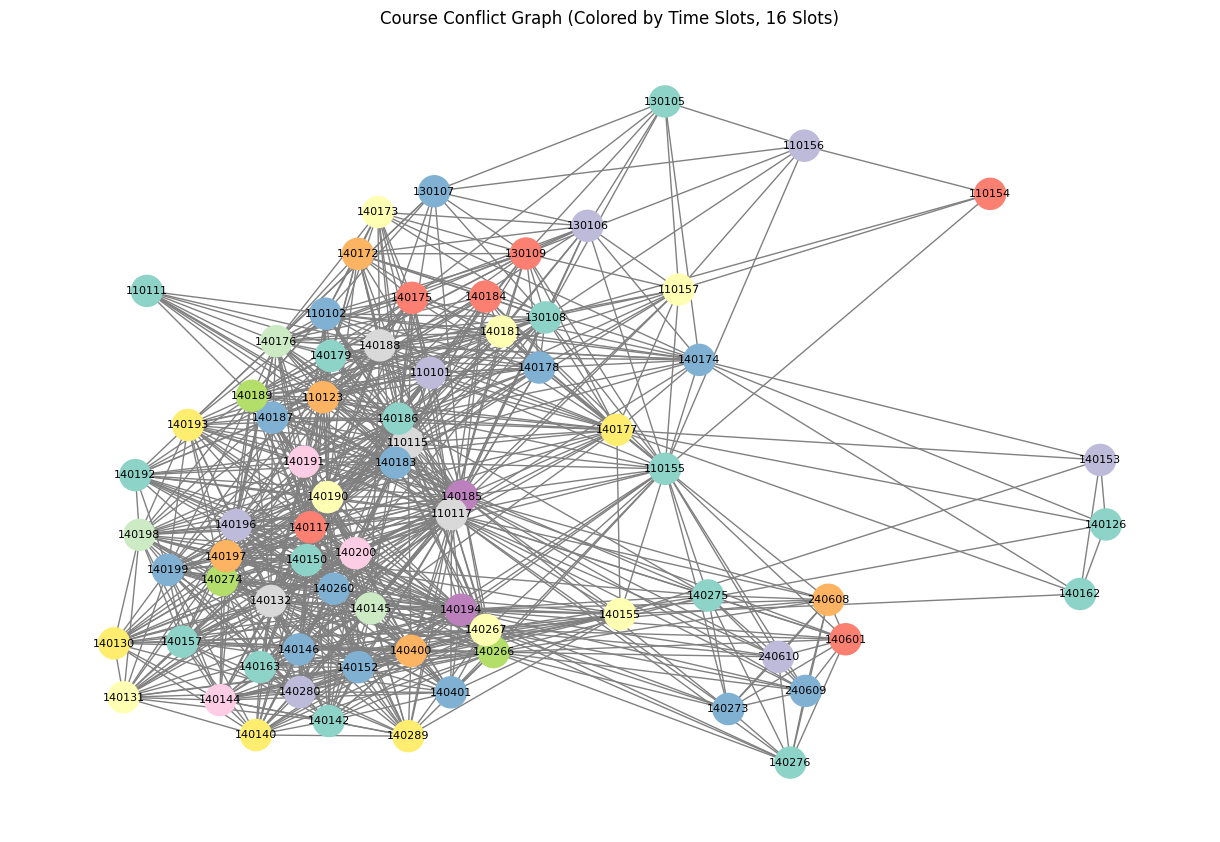

In [19]:
# Assign colors to nodes for visualization
node_colors = [coloring[node] for node in G.nodes()]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Consistent layout
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set3, 
        edge_color='gray', node_size=500, font_size=8)
plt.title(f"Course Conflict Graph (Colored by Time Slots, {num_slots} Slots)")
plt.show()

In [20]:
df.groupby('courseid')['id'].nunique().sort_values(ascending=False).head(10)

courseid
110117    55
140185    45
140176    44
140179    44
140181    39
140178    38
140186    38
140174    37
140177    36
130109    34
Name: id, dtype: int64

In [21]:
student_counts = df.groupby('courseid')['id'].apply(lambda x: len(set(x)))

# Convert to a dictionary for easy reference
student_counts_dict = student_counts.to_dict()

# Print the number of students per course
print("Number of students per course:")
for course, count in student_counts_dict.items():
    print(f"Course {course}: {count} students")

Number of students per course:
Course 110101: 30 students
Course 110102: 29 students
Course 110111: 2 students
Course 110115: 19 students
Course 110117: 55 students
Course 110123: 27 students
Course 110154: 6 students
Course 110155: 10 students
Course 110156: 6 students
Course 110157: 9 students
Course 130105: 31 students
Course 130106: 32 students
Course 130107: 30 students
Course 130108: 34 students
Course 130109: 34 students
Course 140117: 27 students
Course 140126: 1 students
Course 140130: 12 students
Course 140131: 8 students
Course 140132: 17 students
Course 140140: 8 students
Course 140142: 6 students
Course 140144: 13 students
Course 140145: 14 students
Course 140146: 7 students
Course 140150: 20 students
Course 140152: 12 students
Course 140153: 1 students
Course 140155: 5 students
Course 140157: 12 students
Course 140162: 1 students
Course 140163: 11 students
Course 140172: 28 students
Course 140173: 29 students
Course 140174: 37 students
Course 140175: 31 students
Course 14

Visalization for the number of student for each course

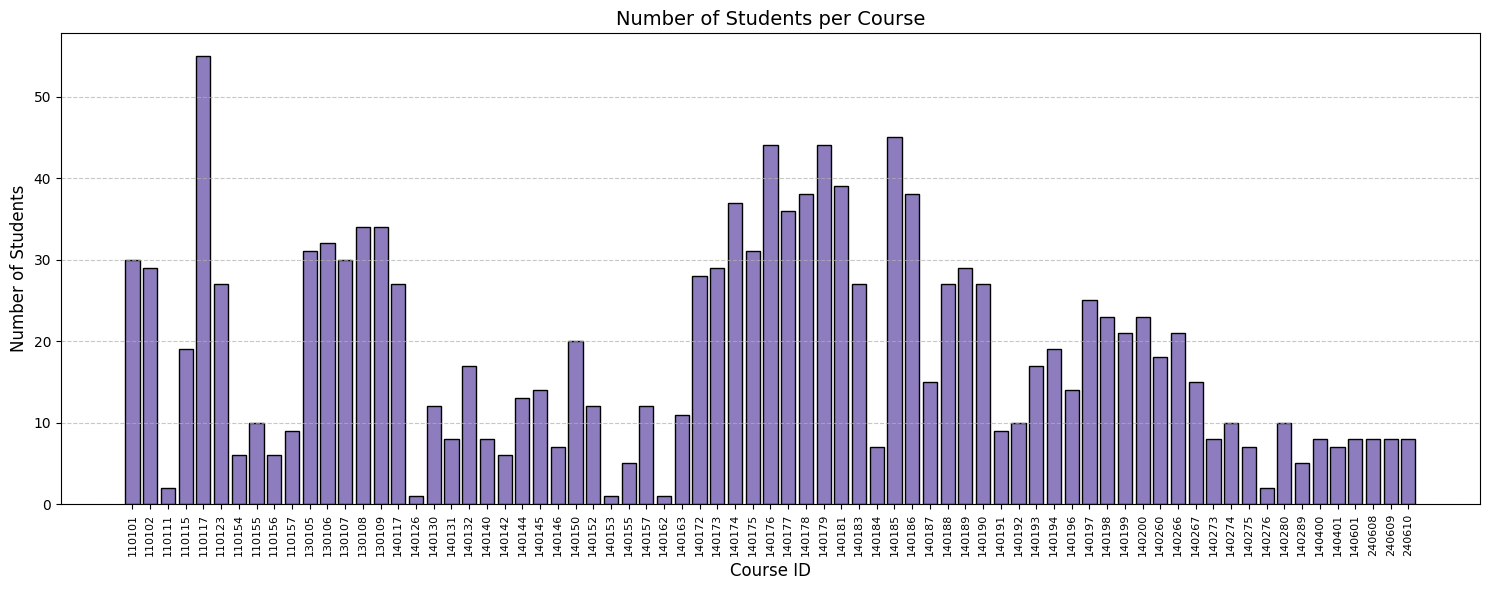

In [22]:
# Create a bar plot
plt.figure(figsize=(15, 6))  # Wide figure to accommodate many courses
plt.bar(student_counts.index.astype(str), student_counts.values, color='#8E7DBE', edgecolor='black')

# Customize the plot
plt.title("Number of Students per Course", fontsize=14)
plt.xlabel("Course ID", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=90, fontsize=8)  # Rotate course IDs for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [23]:
degrees = dict(G.degree())

In [24]:
degrees.items()

dict_items([(np.int64(240610), 12), (np.int64(140187), 22), (np.int64(240608), 12), (np.int64(140132), 37), (np.int64(140274), 29), (np.int64(110115), 39), (np.int64(140150), 38), (np.int64(140117), 46), (np.int64(110111), 10), (np.int64(140176), 31), (np.int64(140140), 22), (np.int64(140200), 35), (np.int64(140144), 27), (np.int64(140275), 14), (np.int64(140153), 5), (np.int64(140401), 20), (np.int64(140191), 30), (np.int64(140189), 33), (np.int64(130106), 15), (np.int64(130109), 21), (np.int64(140192), 20), (np.int64(140142), 24), (np.int64(140185), 50), (np.int64(140194), 38), (np.int64(110154), 4), (np.int64(130105), 8), (np.int64(140173), 14), (np.int64(110102), 24), (np.int64(140183), 30), (np.int64(110101), 28), (np.int64(110117), 64), (np.int64(240609), 12), (np.int64(140184), 17), (np.int64(140179), 25), (np.int64(110123), 33), (np.int64(140188), 25), (np.int64(140197), 31), (np.int64(140193), 26), (np.int64(140146), 25), (np.int64(140280), 29), (np.int64(140276), 10), (np.int

Visualizing the dgree for each node (course)

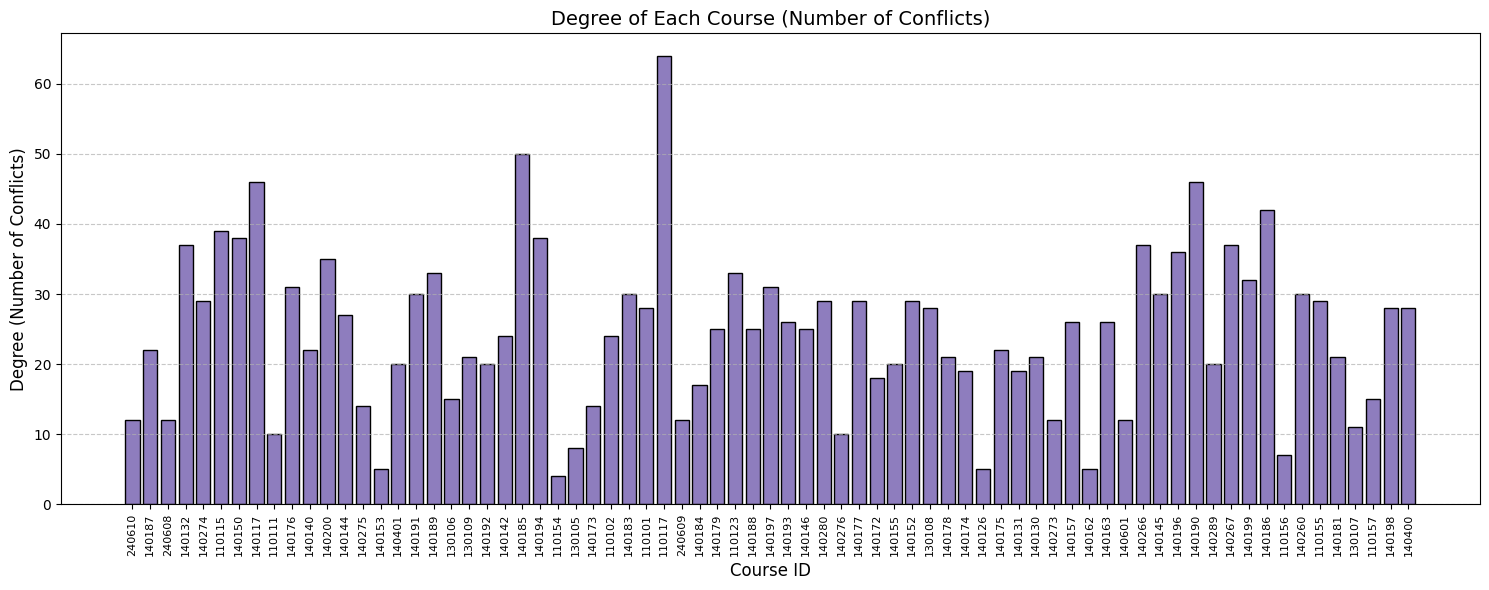

In [25]:
# Bar plot for degrees
courses = list(degrees.keys())
degree_values = list(degrees.values())
plt.figure(figsize=(15, 6))
plt.bar([str(course) for course in courses], degree_values, color='#8E7DBE', edgecolor='black')
plt.title("Degree of Each Course (Number of Conflicts)", fontsize=14)
plt.xlabel("Course ID", fontsize=12)
plt.ylabel("Degree (Number of Conflicts)", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Creating exam timtable for engineering

In [26]:
course_names = engineering.groupby('courseid')['coursename'].first().to_dict()
time_slots = {course: color + 1 for course, color in coloring.items()}
# Step 7: Create the timetable DataFrame
timetable_data_engineering = {
    'Course Code': [],
    'Course Name': [],
    'Number of Students': [],
    'Time Slot': []
}

for course in courses:
    timetable_data_engineering['Course Code'].append(course)
    timetable_data_engineering['Course Name'].append(course_names.get(course, 'Unknown'))
    timetable_data_engineering['Number of Students'].append(student_counts_dict.get(course, 0))
    timetable_data_engineering['Time Slot'].append(time_slots.get(course, 0))

timetable_df_engineering= pd.DataFrame(timetable_data_engineering)
timetable_df_engineering = timetable_df_engineering.sort_values(['Time Slot', 'Course Code'])


In [27]:
timetable_df_engineering['Time Slot'].value_counts()

Time Slot
1     8
2     7
3     7
4     7
7     7
5     6
6     6
8     5
15    4
9     3
12    3
10    3
14    3
13    2
11    1
16    1
Name: count, dtype: int64

In [28]:
timetable_df_engineering.head(15)

,Course Code,Course Name,Number of Students,Time Slot
8,110111,التحرير العربي,2,1
45,130108,ريادة الأعمال,34,1
48,140126,كهرومغناطيسية2,1,1
21,140142,الكترونيات القوى,6,1
6,140150,الإقتصاد الهندسي,20,1
33,140179,أساسيات الرسم الهندسي,44,1
20,140192,الطرائق الحسابية في الهندسة الكهربائية,10,1
13,140275,التحويل الكهروميكانيكي للطاقة1,7,1
67,110155,مهارات الاتصال,10,2
25,130105,اللغة الإنجليزية (2),31,2


Saving the timetable in excel sheet

In [29]:
output_file_engineering = 'exam_timetable_engineering.xlsx'
timetable_df_engineering.to_excel(output_file_engineering, index=False, engine='openpyxl')
print(f"\nTimetable saved to '{output_file_engineering}'")


Timetable saved to 'exam_timetable_engineering.xlsx'


## Now doing it all again for the reset of the sheets

# 2. Computer

In [30]:
G_computer = nx.Graph()
courses = computer['courseid'].unique()
G_computer.add_nodes_from(courses)

# Add edges for courses with overlapping students
for i, course1 in enumerate(courses):
    for course2 in courses[i+1:]:
        if course_students_computer[course1] & course_students_computer[course2]:  # Check for common students
            G_computer.add_edge(course1, course2)

# Verify the number of nodes and edges
print(f"Number of courses (nodes): {G_computer.number_of_nodes()}")
print(f"Number of conflicts (edges): {G_computer.number_of_edges()}")

Number of courses (nodes): 95
Number of conflicts (edges): 747


In [31]:
coloring = nx.coloring.greedy_color(G_computer, strategy='smallest_last')

num_slots = len(set(coloring.values()))
f"Number of time slots needed: {num_slots}"

'Number of time slots needed: 11'

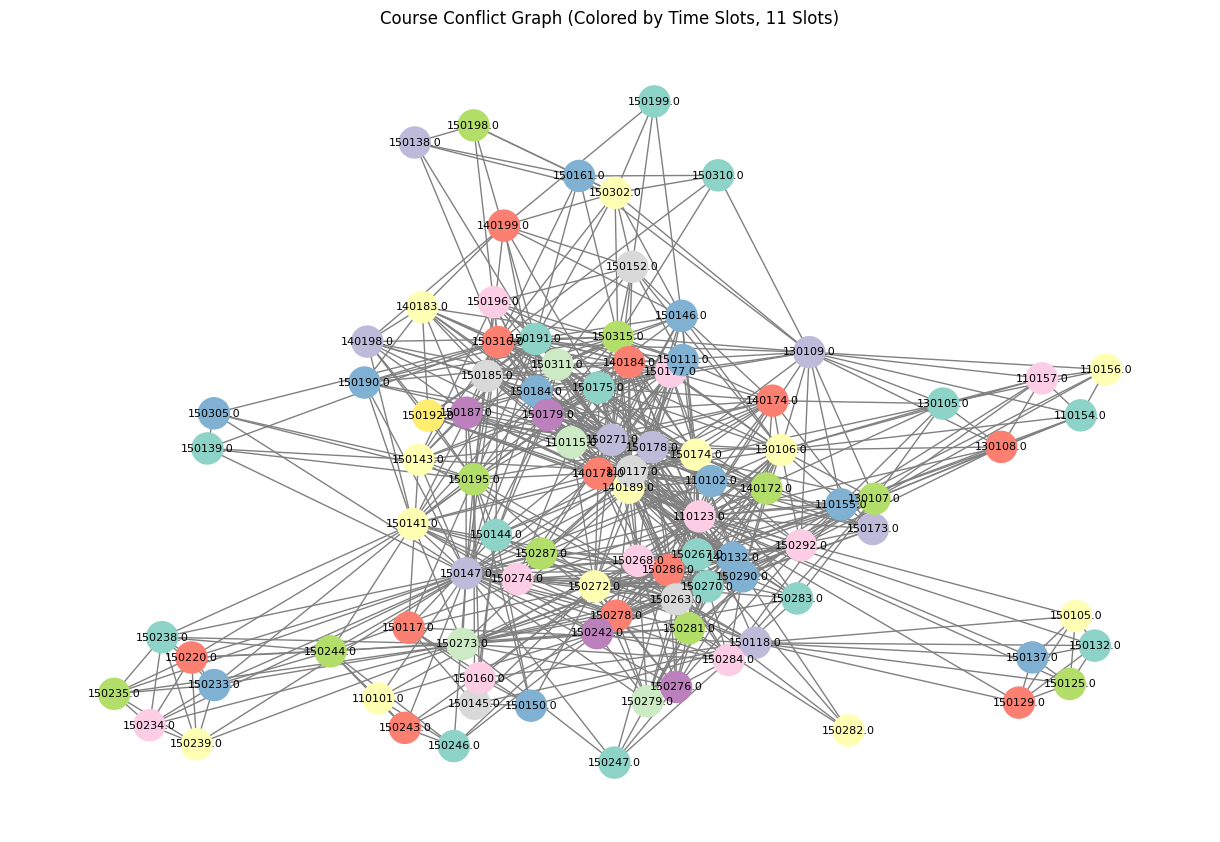

In [32]:
# Assign colors to nodes for visualization
node_colors = [coloring[node] for node in G_computer.nodes()]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_computer, seed=42)  # Consistent layout
nx.draw(G_computer, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set3, 
        edge_color='gray', node_size=500, font_size=8)
plt.title(f"Course Conflict Graph (Colored by Time Slots, {num_slots} Slots)")
plt.show()


Visuallizing number of students for each computer course

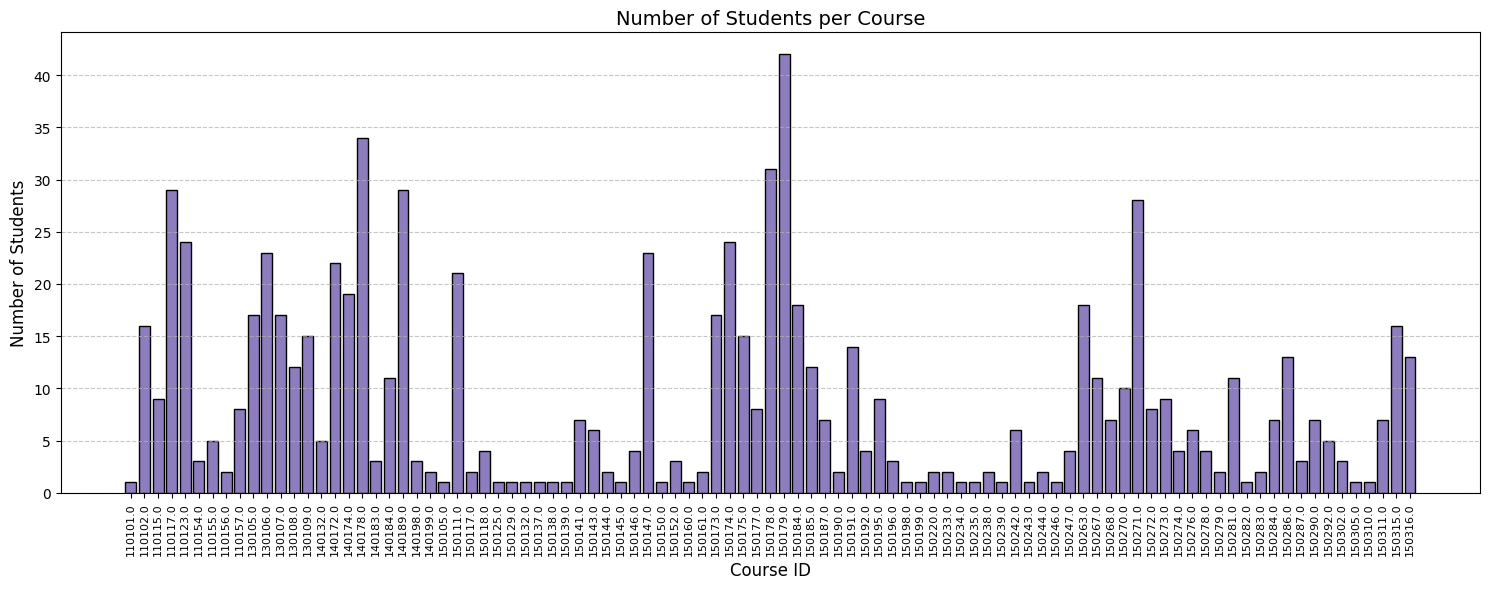

In [33]:
# Create a bar plot
plt.figure(figsize=(15, 6))  # Wide figure to accommodate many courses
plt.bar(student_counts_computer.index.astype(str), student_counts_computer.values, color='#8E7DBE', edgecolor='black')

# Customize the plot
plt.title("Number of Students per Course", fontsize=14)
plt.xlabel("Course ID", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=90, fontsize=8)  # Rotate course IDs for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

Visualizing the dgree of every node (course)

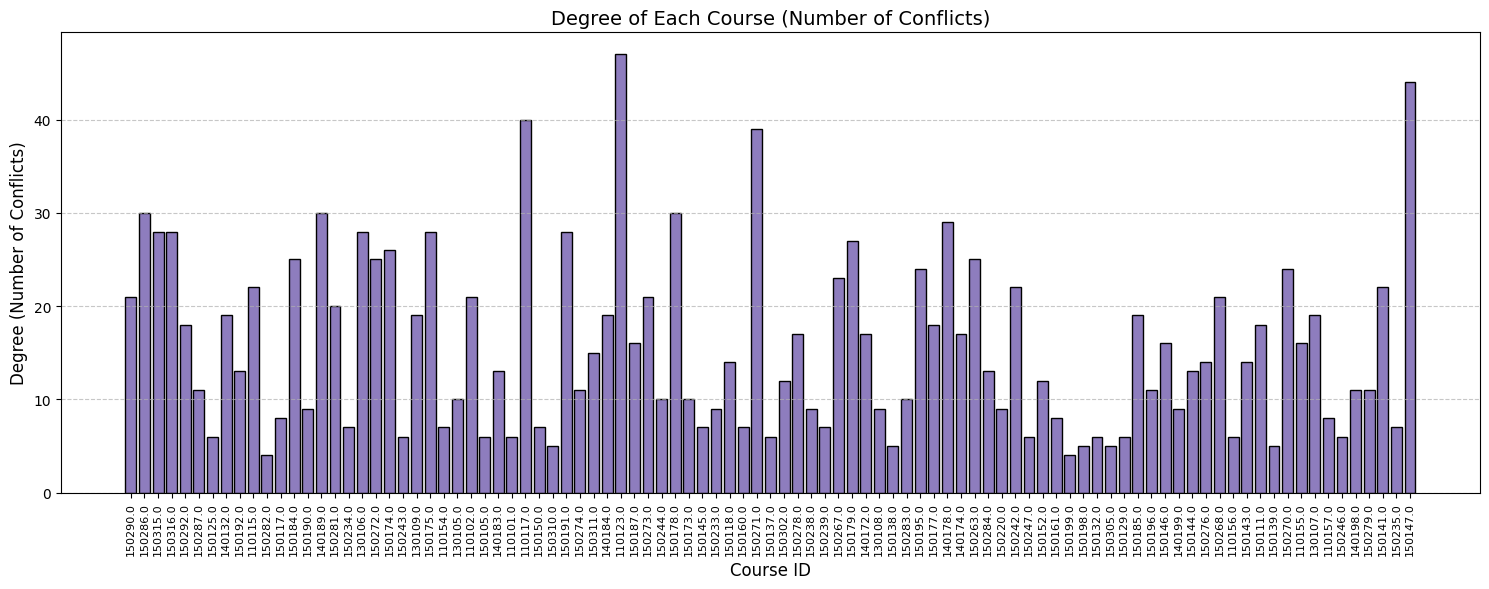

In [34]:
degrees_computer = dict(G_computer.degree())

courses = list(degrees_computer.keys())
degrees_computer_values = list(degrees_computer.values())
plt.figure(figsize=(15, 6))
plt.bar([str(course) for course in courses], degrees_computer_values, color='#8E7DBE', edgecolor='black')
plt.title("Degree of Each Course (Number of Conflicts)", fontsize=14)
plt.xlabel("Course ID", fontsize=12)
plt.ylabel("Degree (Number of Conflicts)", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Creating the exam timetable for computer

In [35]:
course_names = computer.groupby('courseid')['coursename'].first().to_dict()
time_slots = {course: color + 1 for course, color in coloring.items()}
# Step 7: Create the timetable DataFrame
timetable_data_computer = {
    'Course Code': [],
    'Course Name': [],
    'Number of Students': [],
    'Time Slot': []
}

for course in courses:
    timetable_data_computer['Course Code'].append(course)
    timetable_data_computer['Course Name'].append(course_names.get(course, 'Unknown'))
    timetable_data_computer['Number of Students'].append(student_counts_computer.get(course, 0))
    timetable_data_computer['Time Slot'].append(time_slots.get(course, 0))

timetable_df_computer= pd.DataFrame(timetable_data_computer)
timetable_df_computer = timetable_df_computer.sort_values(['Time Slot', 'Course Code'])


In [36]:
timetable_df_computer['Time Slot'].value_counts()

Time Slot
1     15
2     13
5     13
4     12
6     10
7     10
3      8
8      5
9      4
10     4
11     1
Name: count, dtype: int64

In [37]:
timetable_df_computer.head(15)

,Course Code,Course Name,Number of Students,Time Slot
23,110154.0,اللغة الانجليزية (1),3,1
24,130105.0,اللغة الإنجليزية (2),17,1
71,150132.0,معمل الاتصالات الرقمية,1,1
84,150139.0,مقدمة للتحكم الرقمي,1,1
78,150144.0,معمل تصميم النظم الرقمية,2,1
22,150175.0,الكيمياء العامة 1,15,1
32,150191.0,إشارات ونظم,14,1
69,150199.0,معالجة النظم الرقمية,1,1
50,150238.0,تعريب الحاسبات,2,1
89,150246.0,مواضيع مختارة في علوم الحاسب,1,1


Saving the timetable in excel 

In [ ]:
output_file_computer = 'exam_timetable_computer.xlsx'
timetable_df_computer.to_excel(output_file_computer, index=False, engine='openpyxl')
print(f"\nTimetable saved to '{output_file_computer}'")


Timetable saved to 'exam_timetable_computer.xlsx'


# 3. Medical

In [39]:
G_medical = nx.Graph()
courses = medical['courseid'].unique()
G_medical.add_nodes_from(courses)

# Add edges for courses with overlapping students
for i, course1 in enumerate(courses):
    for course2 in courses[i+1:]:
        if course_students_medical[course1] & course_students_medical[course2]:  # Check for common students
            G_medical.add_edge(course1, course2)

# Verify the number of nodes and edges
print(f"Number of courses (nodes): {G_medical.number_of_nodes()}")
print(f"Number of conflicts (edges): {G_medical.number_of_edges()}")

Number of courses (nodes): 108
Number of conflicts (edges): 784


In [40]:

coloring = nx.coloring.greedy_color(G_medical, strategy='smallest_last')

num_slots = len(set(coloring.values()))
f"Number of time slots needed: {num_slots}"

'Number of time slots needed: 12'

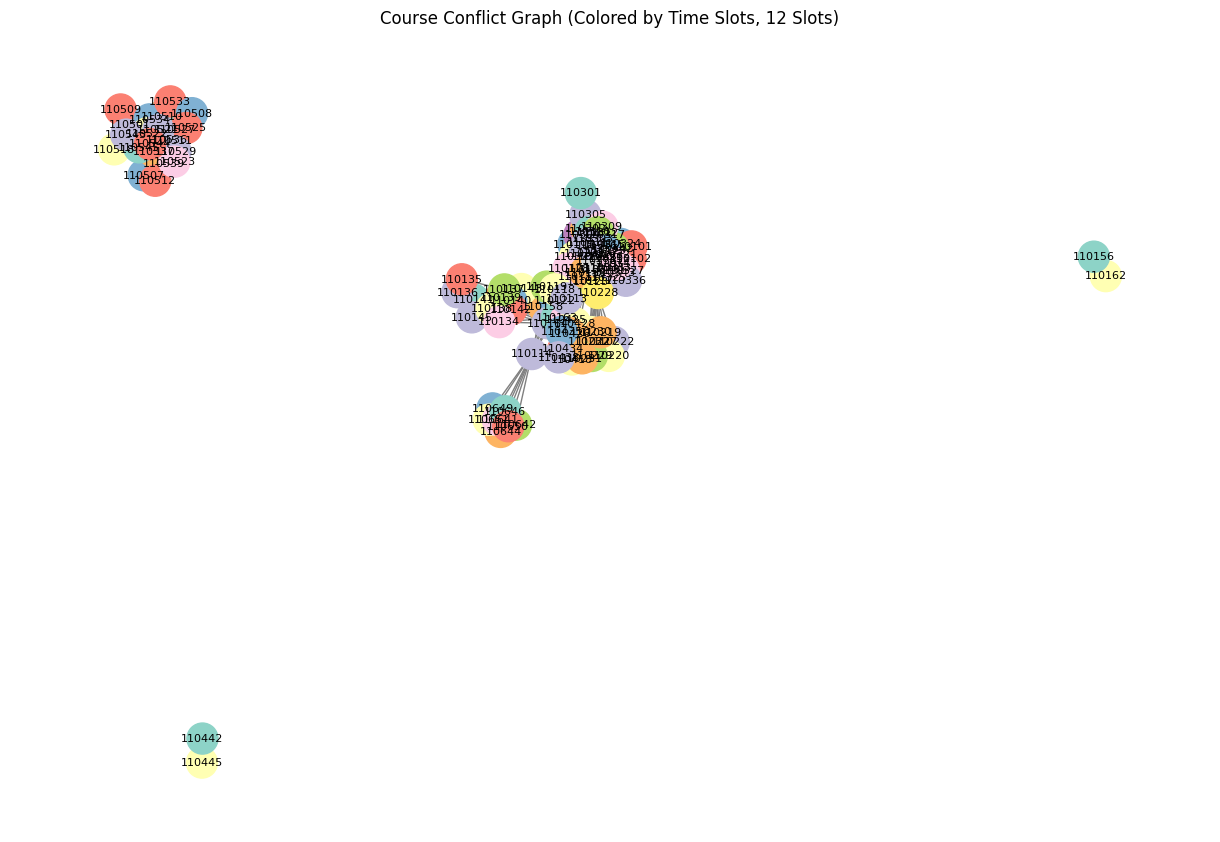

In [41]:
# Assign colors to nodes for visualization
node_colors = [coloring[node] for node in G_medical.nodes()]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_medical, seed=42)  # Consistent layout
nx.draw(G_medical, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set3, 
        edge_color='gray', node_size=500, font_size=8)
plt.title(f"Course Conflict Graph (Colored by Time Slots, {num_slots} Slots)")
plt.show()

Visalizing the number of students for each medical course

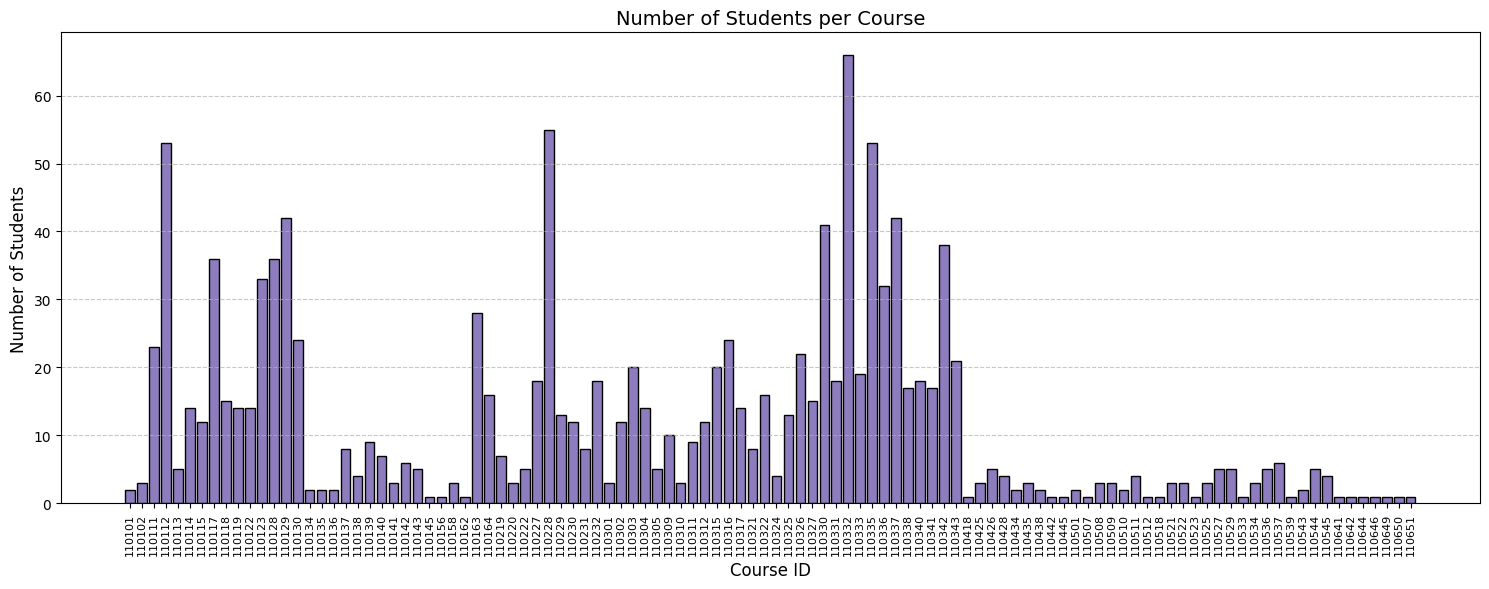

In [42]:

plt.figure(figsize=(15, 6)) 
plt.bar(student_counts_medical.index.astype(str), student_counts_medical.values, color='#8E7DBE', edgecolor='black')

plt.title("Number of Students per Course", fontsize=14)
plt.xlabel("Course ID", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=90, fontsize=8)  
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

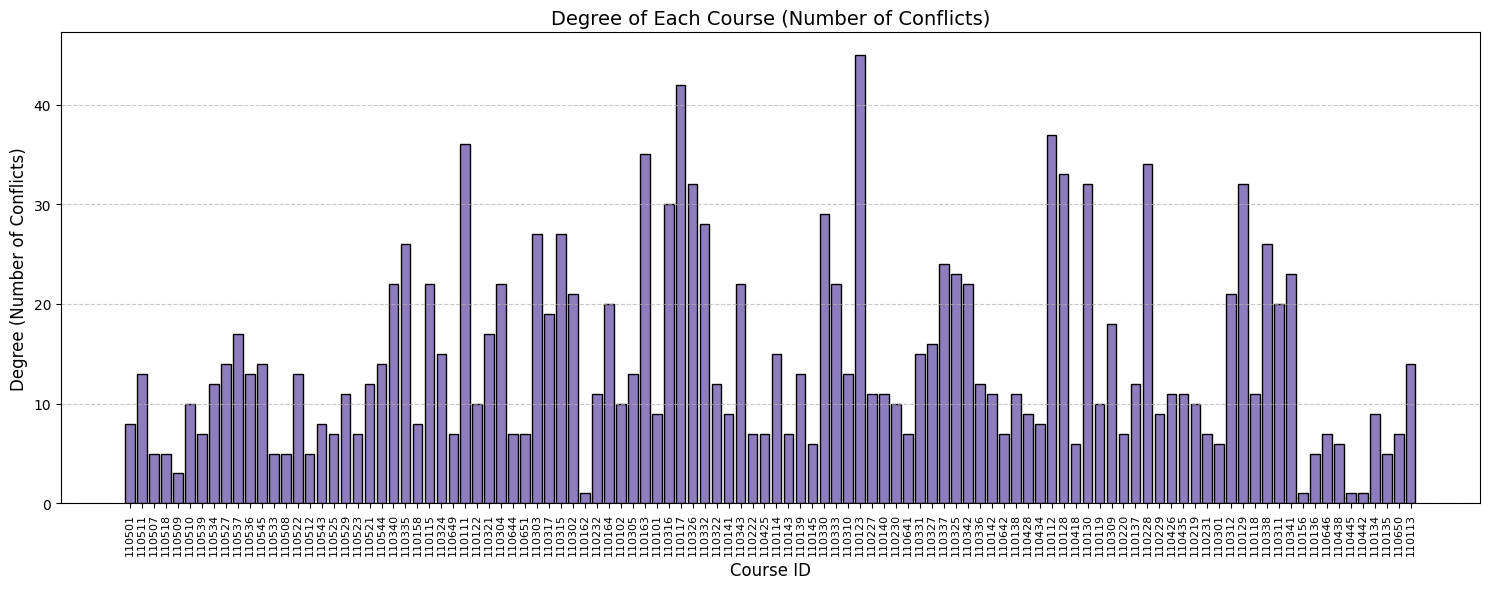

In [43]:
degrees_medical = dict(G_medical.degree())


# Bar plot for degrees
courses = list(degrees_medical.keys())
degrees_medical_values = list(degrees_medical.values())
plt.figure(figsize=(15, 6))
plt.bar([str(course) for course in courses], degrees_medical_values, color='#8E7DBE', edgecolor='black')
plt.title("Degree of Each Course (Number of Conflicts)", fontsize=14)
plt.xlabel("Course ID", fontsize=12)
plt.ylabel("Degree (Number of Conflicts)", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Creating the exam timetable for Medical

In [44]:
course_names = medical.groupby('courseid')['courseName'].first().to_dict()
time_slots = {course: color + 1 for course, color in coloring.items()}

timetable_data_medical = {
    'Course Code': [],
    'Course Name': [],
    'Number of Students': [],
    'Time Slot': []
}

for course in courses:
    timetable_data_medical['Course Code'].append(course)
    timetable_data_medical['Course Name'].append(course_names.get(course, 'Unknown'))
    timetable_data_medical['Number of Students'].append(student_counts_medical.get(course, 0))
    timetable_data_medical['Time Slot'].append(time_slots.get(course, 0))

timetable_df_medical= pd.DataFrame(timetable_data_medical)
timetable_df_medical = timetable_df_medical.sort_values(['Time Slot', 'Course Code'])

In [45]:
timetable_df_medical['Time Slot'].value_counts()

Time Slot
2     17
3     16
4     15
1     13
5     12
6     11
7      9
8      9
10     2
12     2
9      1
11     1
Name: count, dtype: int64

In [46]:
timetable_df_medical.head(10)

,Course Code,Course Name,Number of Students,Time Slot
50,110141,النواحي الطبية لحالات العجز,3,1
98,110156,مقدمة في الرياضيات (1),1,1
43,110163,المهارات اللغوية,28,1
91,110301,لغة انجليزية 1,3,1
60,110310,أسس التمريض,3,1
35,110317,القياس الصحي,14,1
30,110321,التمريض الطبي الجراحي,8,1
58,110330,أسس التعليم والتدريس,41,1
23,110335,الاختلافات الاجتماعية الثقافية المتعلقة بالصحة,53,1
103,110442,ممارسة اكلينكية لأجهزة الاشعة المتحركة,1,1


Saving the timetable in excel sheet

In [47]:
output_file_medical= 'exam_timetable_medical.xlsx'
timetable_df_medical.to_excel(output_file_medical, index=False, engine='openpyxl')
print(f"\nTimetable saved to '{output_file_medical}'")


Timetable saved to 'exam_timetable_medical.xlsx'


# 4.Dentistry

In [48]:
G_dentistry = nx.Graph()
courses = dentistry['courseid'].unique()
G_dentistry.add_nodes_from(courses)

# Add edges for courses with overlapping students
for i, course1 in enumerate(courses):
    for course2 in courses[i+1:]:
        if course_students_dentistry[course1] & course_students_dentistry[course2]:  # Check for common students
            G_dentistry.add_edge(course1, course2)

# Verify the number of nodes and edges
print(f"Number of courses (nodes): {G_dentistry.number_of_nodes()}")
print(f"Number of conflicts (edges): {G_dentistry.number_of_edges()}")

Number of courses (nodes): 99
Number of conflicts (edges): 1325


In [49]:
# Apply greedy coloring
coloring = nx.coloring.greedy_color(G_dentistry, strategy='DSATUR')

# Number of time slots
num_slots = len(set(coloring.values()))
print(f"Number of time slots needed: {num_slots}")

# Verify no adjacent nodes share the same color
for u, v in G_dentistry.edges():
    if coloring[u] == coloring[v]:
        print(f"Error: Adjacent nodes {u} and {v} share the same color {coloring[u]}")

Number of time slots needed: 19


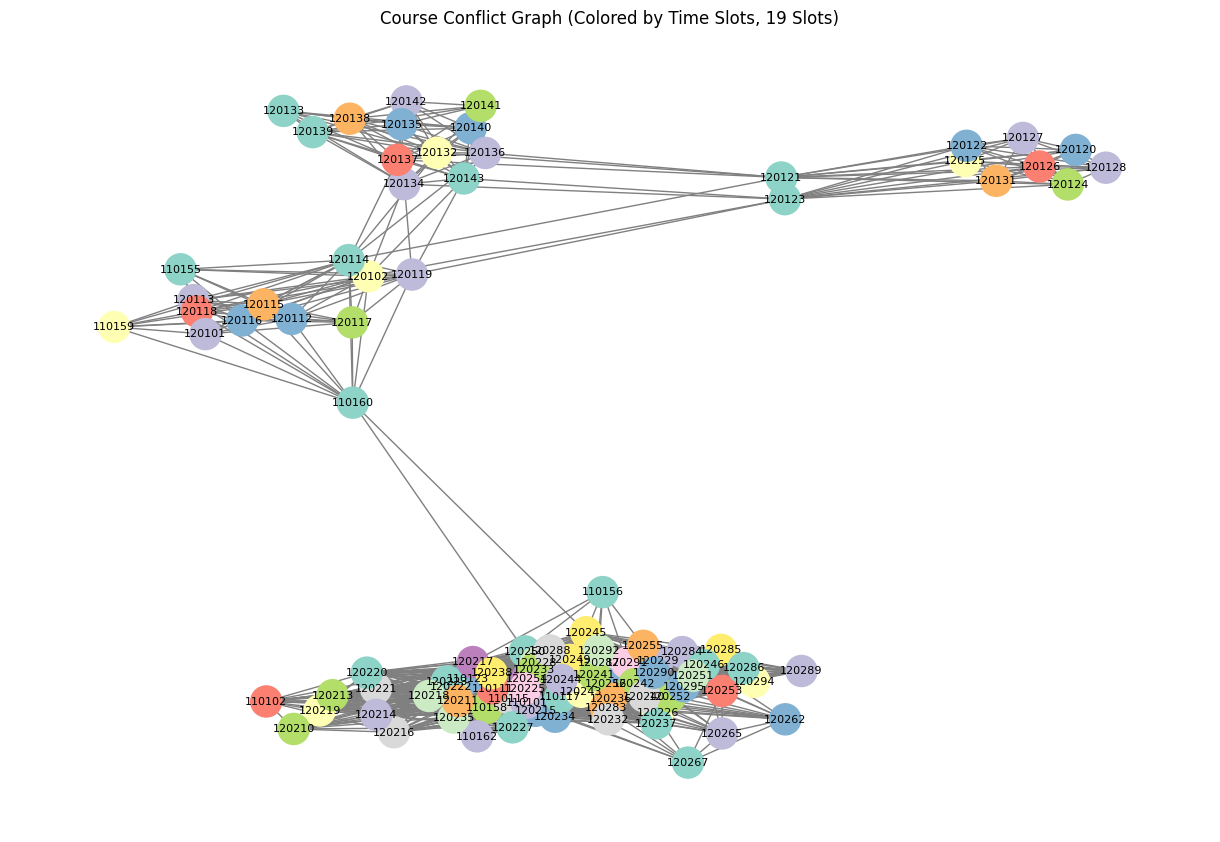


Exam Timetable:
Time Slot 0: [np.int64(110117), np.int64(120246), np.int64(120223), np.int64(120237), np.int64(110156), np.int64(110160), np.int64(110155), np.int64(120143), np.int64(120133), np.int64(120121)]
Time Slot 1: [np.int64(120250), np.int64(120286), np.int64(120220), np.int64(120227), np.int64(120267), np.int64(120114), np.int64(120123), np.int64(120139)]
Time Slot 2: [np.int64(120243), np.int64(120294), np.int64(120226), np.int64(120219), np.int64(120102), np.int64(110159), np.int64(120132), np.int64(120125)]
Time Slot 3: [np.int64(110101), np.int64(120229), np.int64(120284), np.int64(110162), np.int64(120119), np.int64(120101), np.int64(120136), np.int64(120128)]
Time Slot 4: [np.int64(120244), np.int64(120214), np.int64(120289), np.int64(120265), np.int64(120113), np.int64(120134), np.int64(120142), np.int64(120127)]
Time Slot 5: [np.int64(110111), np.int64(120253), np.int64(110102), np.int64(120118), np.int64(120137), np.int64(120126)]
Time Slot 6: [np.int64(110123), np.

In [50]:
# Assign colors to nodes for visualization
node_colors = [coloring[node] for node in G_dentistry.nodes()]

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_dentistry, seed=42)  # Consistent layout
nx.draw(G_dentistry, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set3, 
        edge_color='gray', node_size=500, font_size=8)
plt.title(f"Course Conflict Graph (Colored by Time Slots, {num_slots} Slots)")
plt.show()

# Print the timetable
print("\nExam Timetable:")
for slot in range(num_slots):
    slot_courses = [course for course, color in coloring.items() if color == slot]
    print(f"Time Slot {slot}: {slot_courses}")

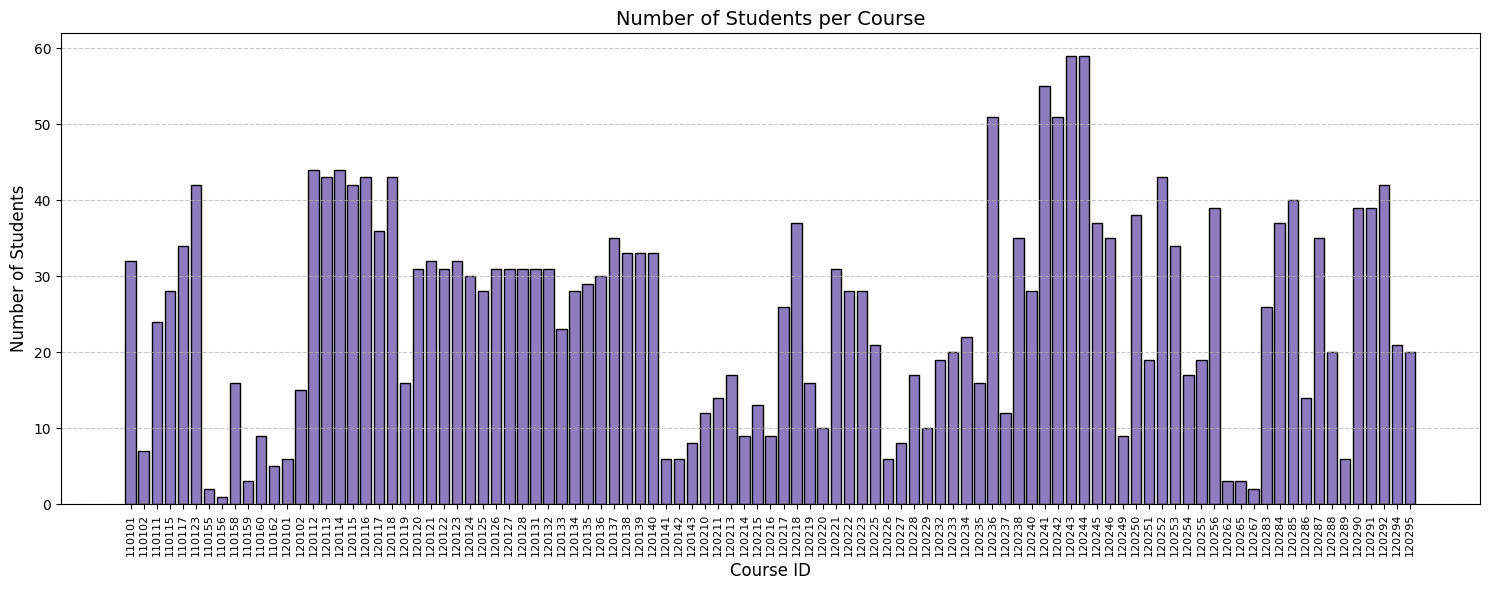

In [51]:
# Create a bar plot
plt.figure(figsize=(15, 6))  # Wide figure to accommodate many courses
plt.bar(student_counts_dentistry.index.astype(str), student_counts_dentistry.values, color='#8E7DBE', edgecolor='black')

# Customize the plot
plt.title("Number of Students per Course", fontsize=14)
plt.xlabel("Course ID", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=90, fontsize=8)  # Rotate course IDs for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

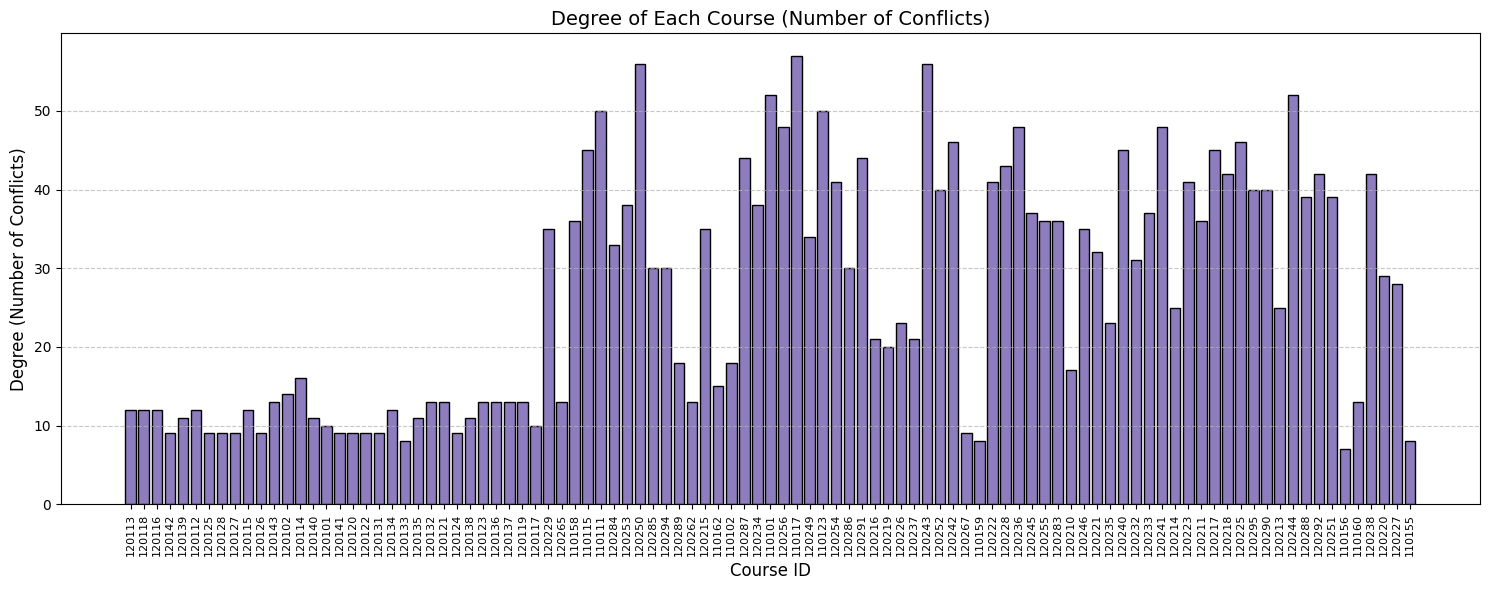

In [52]:
degrees_dentistry = dict(G_dentistry.degree())

# Bar plot for degrees
courses = list(degrees_dentistry.keys())
degrees_dentistry_values = list(degrees_dentistry.values())
plt.figure(figsize=(15, 6))
plt.bar([str(course) for course in courses], degrees_dentistry_values, color='#8E7DBE', edgecolor='black')
plt.title("Degree of Each Course (Number of Conflicts)", fontsize=14)
plt.xlabel("Course ID", fontsize=12)
plt.ylabel("Degree (Number of Conflicts)", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Creating the exam timetable for dentistry

In [53]:
course_names = dentistry.groupby('courseid')['coursename'].first().to_dict()
time_slots = {course: color + 1 for course, color in coloring.items()}

timetable_data_dentistry = {
    'Course Code': [],
    'Course Name': [],
    'Number of Students': [],
    'Time Slot': []
}

for course in courses:
    timetable_data_dentistry['Course Code'].append(course)
    timetable_data_dentistry['Course Name'].append(course_names.get(course, 'Unknown'))
    timetable_data_dentistry['Number of Students'].append(student_counts_dentistry.get(course, 0))
    timetable_data_dentistry['Time Slot'].append(time_slots.get(course, 0))

timetable_df_dentistry= pd.DataFrame(timetable_data_dentistry)
timetable_df_dentistry = timetable_df_dentistry.sort_values(['Time Slot', 'Course Code'])

In [54]:
timetable_df_dentistry['Time Slot'].value_counts()

Time Slot
1     10
2      8
3      8
4      8
5      8
7      7
9      7
10     7
6      6
8      6
14     4
16     4
11     3
18     3
13     3
15     2
12     2
17     2
19     1
Name: count, dtype: int64

In [55]:
timetable_df_dentistry.head(10)

,Course Code,Course Name,Number of Students,Time Slot
51,110117,النظام الإقتصادي في الإسلام,34,1
98,110155,مهارات الاتصال,2,1
93,110156,مقدمة في الرياضيات (1),1,1
94,110160,مقدمة في الكيمياء العضوية,9,1
24,120121,physics of diagnostic radiology,32,1
21,120133,oral pathology ll,23,1
11,120143,التحرير العربي,8,1
81,120223,علم وظائف الأعضاء -2,28,1
60,120237,صيدلانيات -3,12,1
73,120246,علم السموم,35,1


Saving the timetable in excel sheet

In [56]:
output_file_dentistry= 'exam_timetable_dentistry.xlsx'
timetable_df_dentistry.to_excel(output_file_dentistry, index=False, engine='openpyxl')
f"\nTimetable saved to '{output_file_dentistry}'"

"\nTimetable saved to 'exam_timetable_dentistry.xlsx'"

# 5. Business

In [57]:
G_business = nx.Graph()
courses = business['courseid'].unique()
G_business.add_nodes_from(courses)

# Add edges for courses with overlapping students
for i, course1 in enumerate(courses):
    for course2 in courses[i+1:]:
        if course_students_business[course1] & course_students_business[course2]:  # Check for common students
            G_business.add_edge(course1, course2)


print(f"Number of courses (nodes): {G_business.number_of_nodes()}")
print(f"Number of conflicts (edges): {G_business.number_of_edges()}")

Number of courses (nodes): 176
Number of conflicts (edges): 1808


In [58]:

coloring = nx.coloring.greedy_color(G_business, strategy='smallest_last')

num_slots = len(set(coloring.values()))
f"Number of time slots needed: {num_slots}"


'Number of time slots needed: 14'

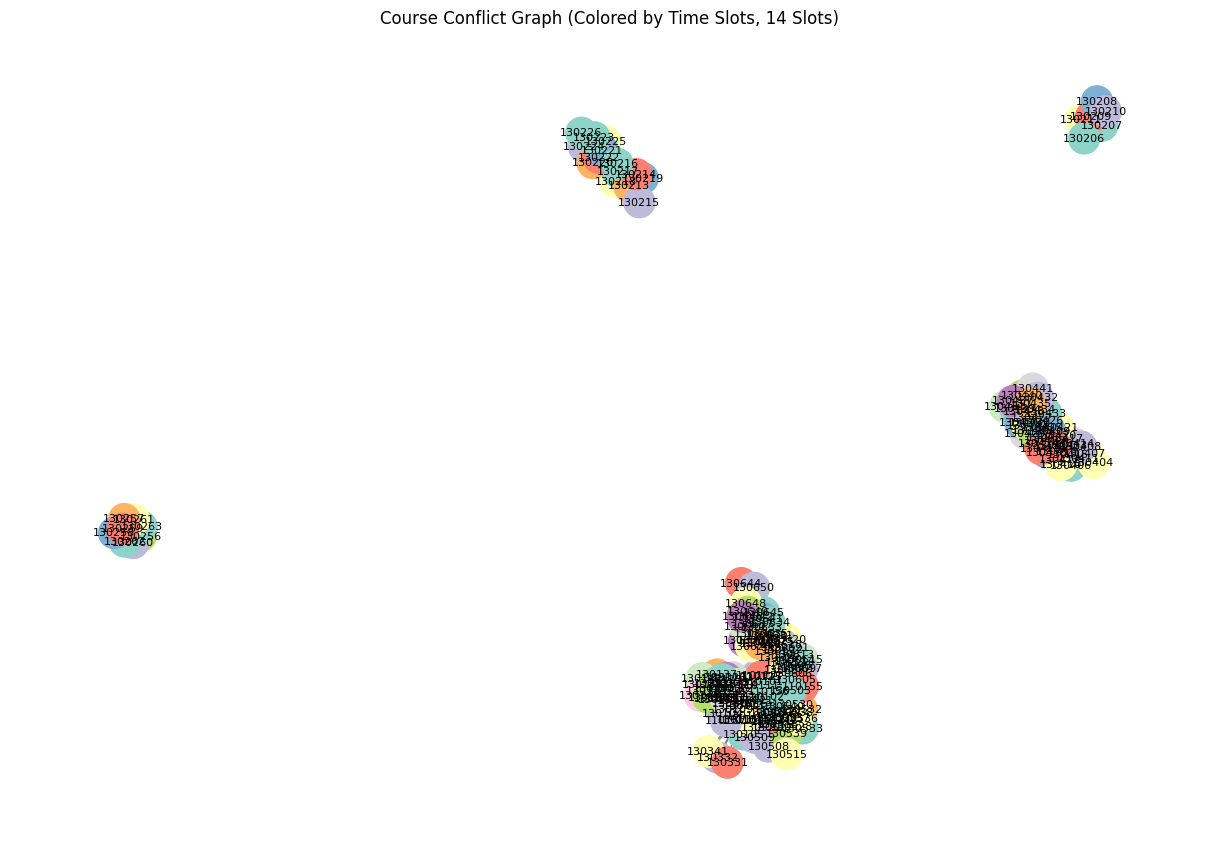

In [59]:
# Assign colors to nodes for visualization
node_colors = [coloring[node] for node in G_business.nodes()]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_business, seed=42)  # Consistent layout
nx.draw(G_business, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set3, 
        edge_color='gray', node_size=500, font_size=8)
plt.title(f"Course Conflict Graph (Colored by Time Slots, {num_slots} Slots)")
plt.show()


visualizing number of student for each course

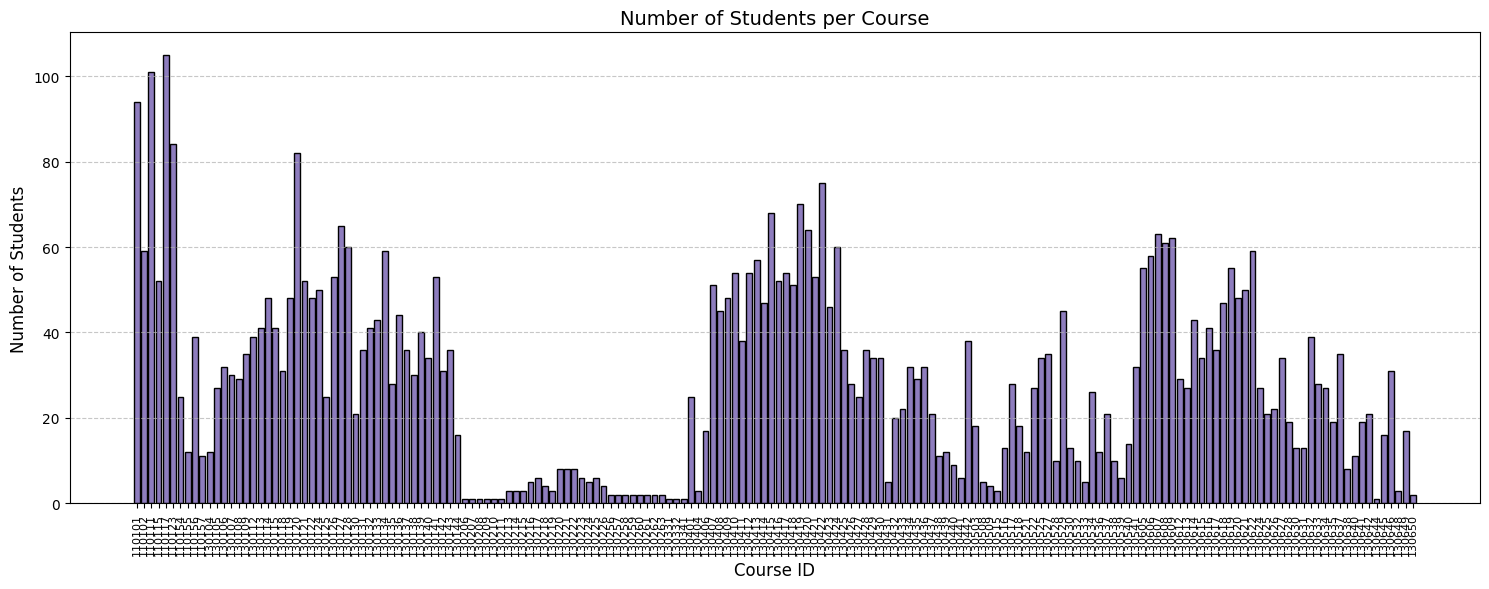

In [60]:

plt.figure(figsize=(15, 6))
plt.bar(student_counts_business.index.astype(str), student_counts_business.values, color='#8E7DBE', edgecolor='black')

plt.title("Number of Students per Course", fontsize=14)
plt.xlabel("Course ID", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=90, fontsize=8)  
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout() 
plt.show()

visualizing the degree of the node (course)

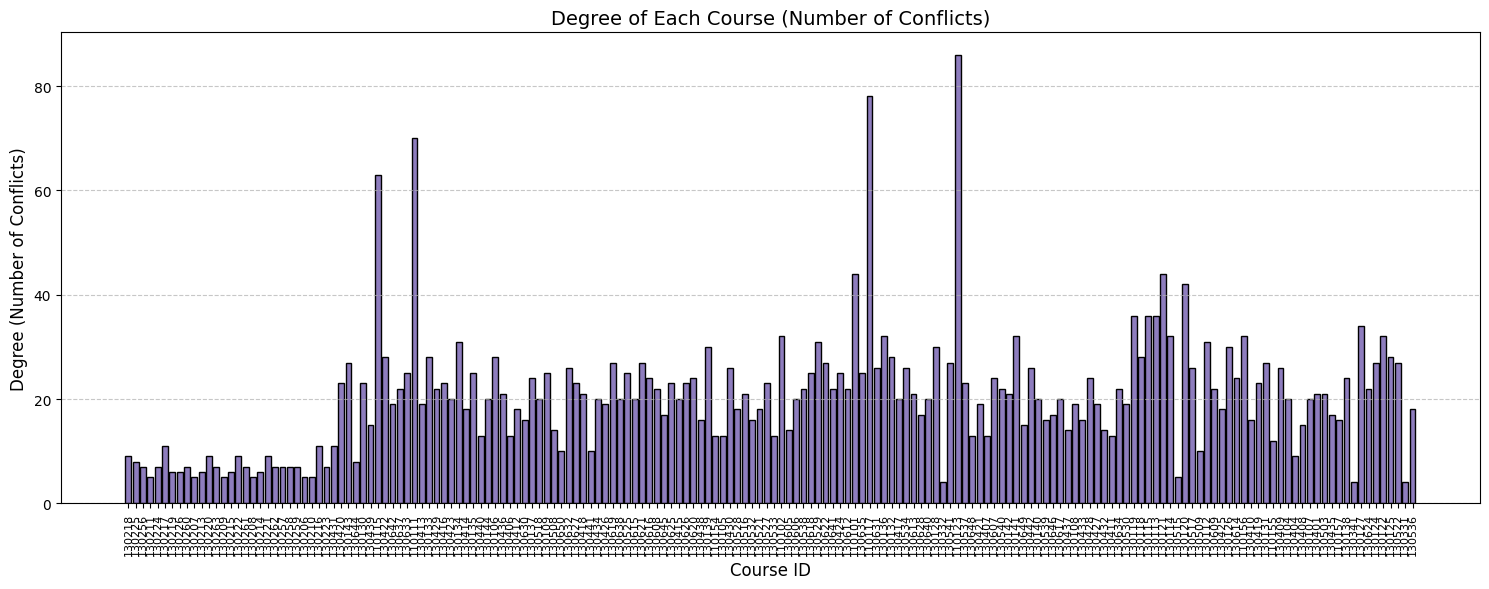

In [61]:
degrees_business = dict(G_business.degree())

# Bar plot for degrees
courses = list(degrees_business.keys())
degrees_business_values = list(degrees_business.values())
plt.figure(figsize=(15, 6))
plt.bar([str(course) for course in courses], degrees_business_values, color='#8E7DBE', edgecolor='black')
plt.title("Degree of Each Course (Number of Conflicts)", fontsize=14)
plt.xlabel("Course ID", fontsize=12)
plt.ylabel("Degree (Number of Conflicts)", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Creating the exam timtable for business

In [62]:
course_names = business.groupby('courseid')['coursename'].first().to_dict()
time_slots = {course: color + 1 for course, color in coloring.items()}

timetable_data_business = {
    'Course Code': [],
    'Course Name': [],
    'Number of Students': [],
    'Time Slot': []
}

for course in courses:
    timetable_data_business['Course Code'].append(course)
    timetable_data_business['Course Name'].append(course_names.get(course, 'Unknown'))
    timetable_data_business['Number of Students'].append(student_counts_business.get(course, 0))
    timetable_data_business['Time Slot'].append(time_slots.get(course, 0))

timetable_df_business= pd.DataFrame(timetable_data_business)
timetable_df_business = timetable_df_business.sort_values(['Time Slot', 'Course Code'])

In [63]:
timetable_df_business['Time Slot'].value_counts()

Time Slot
3     22
1     21
4     19
2     17
7     16
6     15
5     14
8     12
9     12
11    10
10     8
12     6
13     3
14     1
Name: count, dtype: int64

In [64]:
timetable_df_business.head(10)

,Course Code,Course Name,Number of Students,Time Slot
39,110111,التحرير العربي,101,1
158,130104,مهارات الإتصال,12,1
81,130105,اللغة الإنجليزية (2),27,1
172,130125,نظم المعلومات الإدارية,25,1
30,130143,الاتجاهات الحديثة فى إدارة الموارد البشرية,36,1
9,130207,LISTENING2,1,1
26,130216,WRITING3,5,1
27,130223,WRITING4,6,1
12,130263,PROJECT IN TRANSLATION,2,1
43,130416,التربيه البدنيه الخاصه,52,1


saving the timtable in excel sheet

In [65]:
output_file_business= 'exam_timetable_business.xlsx'
timetable_df_business.to_excel(output_file_business, index=False, engine='openpyxl')
f"\nTimetable saved to '{output_file_business}'"

"\nTimetable saved to 'exam_timetable_business.xlsx'"